In [35]:
from keras.models import load_model;
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from skimage.metrics import structural_similarity as ssim
from generate_training_set import crop_input

ModuleNotFoundError: No module named 'generate_training_set'

In [36]:
def crop_input(img, x, y):
    y_slice=slice(y,y+33)
    x_slice=slice(x,x+33)
    return img[y_slice,x_slice]

In [27]:
model=load_model('models/1303')

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 25, 25, 64)        15616     
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 32)        2080      
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 3)         2403      
                                                                 
Total params: 20,099
Trainable params: 20,099
Non-trainable params: 0
_________________________________________________________________


In [29]:
INPUT_DIM = 33
LABEL_SIZE = 21
STRIDE = 14
PAD = int((INPUT_DIM - LABEL_SIZE) / 2.0)

In [22]:
def evaluate(model_path,img):
    model=load_model(model_path)
    img=cv2.resize(img,(800,800),interpolation=cv2.INTER_CUBIC)
    prediction=np.zeros(img.shape)
    height, width = img.shape[:2]
    for x in range(0,width-input_dim,stride):
        for y in range(0,height-input_dim,stride):
            y_slice=slice(y,y+33)
            x_slice=slice(x,x+33)
            #prediction[y_slice,x_slice]=img[y_slice,x_slice]
            prediction[y_slice,x_slice]=model.predict(np.expand_dims(img[y_slice,x_slice],axis=0),verbose=0)
    return prediction.astype('uint8')

In [30]:
paths=np.sort(os.listdir('lr'))
paths_hr = np.sort(os.listdir('hr'))
img=cv2.imread('lr/'+paths[0])
target = cv2.imread('hr/'+paths_hr[0])

In [32]:
output = np.zeros(target.shape)
height, width = output.shape[:2]

In [37]:
for y in range(0, height - INPUT_DIM + 1, LABEL_SIZE):
    for x in range(0, width - INPUT_DIM + 1, LABEL_SIZE):
        img=cv2.resize(img,(800,800),interpolation=cv2.INTER_CUBIC)
        crop = crop_input(img, x, y)
        image_batch = np.expand_dims(crop, axis=0)
        prediction = model.predict(image_batch)
        new_shape = (LABEL_SIZE, LABEL_SIZE, 3)
        prediction = prediction.reshape(new_shape)
        output_y_slice = slice(y + PAD, y + PAD + LABEL_SIZE)
        output_x_slice = slice(x + PAD, x + PAD + LABEL_SIZE)
        output[output_y_slice, output_x_slice] = prediction

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 24ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


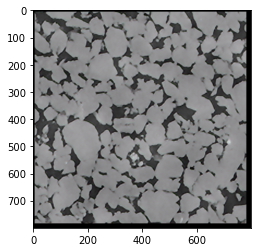

In [39]:
plt.imshow(np.array(output,np.int32))

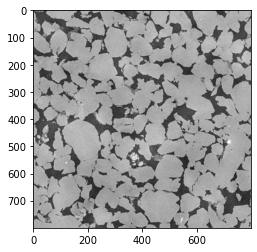

In [40]:
plt.imshow(target)

In [41]:
ssim(target,output, multichannel = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


0.5848727581614961

In [43]:
ssim(output, cv2.resize(img,(800,800),interpolation=cv2.INTER_CUBIC), multichannel = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  """Entry point for launching an IPython kernel.


0.5670898182275362